In [9]:
%pip install pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [11]:
# --- Set up the environment ---
test_filename = os.path.join(os.getcwd(), 'ds04/assets/Test_knight.csv')
train_filename = os.path.join(os.getcwd(), 'ds04/assets/Train_knight.csv')

In [12]:
# --- Load the data to pandas dataframes ---
test_df = pd.read_csv(test_filename)
train_df = pd.read_csv(train_filename)
train_df.set_index('knight')
train_df.head(3)

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.1726,0.1449,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.3150,0.5372,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.15550,0.2540,0.09532,Sith


In [13]:
# --- Separate features and label ---
le = LabelEncoder()
X = train_df.drop(columns=['knight'])
y = train_df['knight']
y_encoded = le.fit_transform(y)  # 'Jedi' → 1, 'Sith' → 0 automatically

# --- set up the train validation and test ---
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_test = test_df.copy()

# scaler = StandardScaler()
# X_train, X_val, y_train, y_val = train_test_split(scaler.fit_transform(X), y_encoded, test_size=0.2, random_state=42)
# X_test = scaler.transform(test_df)

In [14]:
# --- Try multiple k values and collect F1 scores ---
f1_scores = []
k_values = range(1, 30)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred)
    f1_scores.append(f1)
    # Show the classification report
    print(f'k={k}, F1 Score={f1:.4f}')

k=1, F1 Score=0.9388
k=2, F1 Score=0.9783
k=3, F1 Score=0.9583
k=4, F1 Score=0.9677
k=5, F1 Score=0.9474
k=6, F1 Score=0.9677
k=7, F1 Score=0.9485
k=8, F1 Score=0.9684
k=9, F1 Score=0.9691
k=10, F1 Score=0.9792
k=11, F1 Score=0.9691
k=12, F1 Score=0.9792
k=13, F1 Score=0.9792
k=14, F1 Score=0.9792
k=15, F1 Score=0.9792
k=16, F1 Score=0.9792
k=17, F1 Score=0.9691
k=18, F1 Score=0.9792
k=19, F1 Score=0.9691
k=20, F1 Score=0.9691
k=21, F1 Score=0.9592
k=22, F1 Score=0.9592
k=23, F1 Score=0.9592
k=24, F1 Score=0.9592
k=25, F1 Score=0.9592
k=26, F1 Score=0.9592
k=27, F1 Score=0.9495
k=28, F1 Score=0.9495
k=29, F1 Score=0.9495


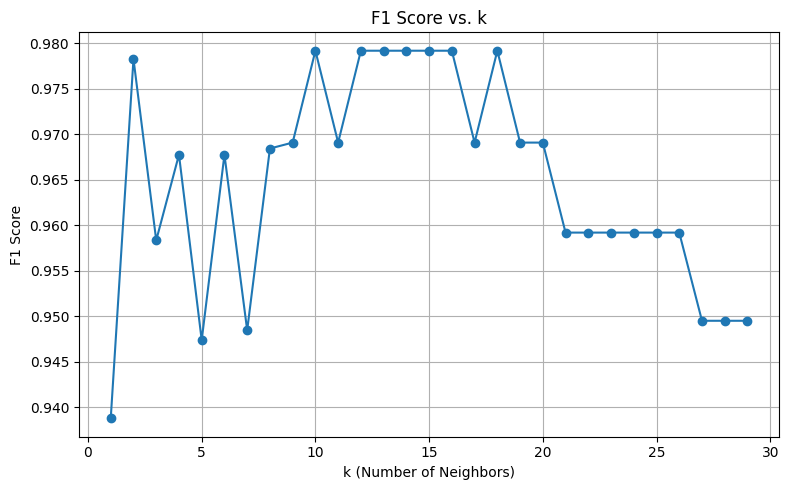

In [15]:
# --- Plot k vs F1-score ---
plt.figure(figsize=(8, 5))
plt.plot(k_values, f1_scores, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. k")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# --- Find best k ---
best_k = k_values[np.argmax(f1_scores)]
best_f1 = max(f1_scores)
print(f"\nBest k: {best_k} with F1 Score: {best_f1:.4f}")


Best k: 10 with F1 Score: 0.9792


In [17]:
# --- Retrain best model on full training set ---
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X, y_encoded)
y_val_pred = final_model.predict(X_val)
report = classification_report(y_val, y_val_pred, target_names=le.classes_, output_dict=True)
print('accuracy: ', report['accuracy'])
print('f1-score:', report['macro avg']['f1-score'])

accuracy:  0.9875
f1-score: 0.9870445344129555


In [18]:
# --- Predict on test set ---
test_pred = final_model.predict(test_df)
predicted_labels = le.inverse_transform(test_pred)
print(predicted_labels[:10])

['Sith' 'Jedi' 'Jedi' 'Sith' 'Jedi' 'Jedi' 'Jedi' 'Jedi' 'Jedi' 'Jedi']


In [19]:
# --- Export to KNN.txt ---
dir = os.path.join(os.getcwd(), 'ds04/ex05')
filename = os.path.join(dir, 'KNN.txt')

with open(filename, "w") as f:
    for label in predicted_labels:
        f.write(label + "\n")

print("Predictions saved to KNN.txt")

Predictions saved to KNN.txt
